Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set()
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [5]:
Elect_df= pd.read_excel("Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")
Elect_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


Shape function shows the number of rows and columns in a dataframe.

In [6]:
print('The dataset has {} rows and {} columns'.format(Elect_df.shape[0],Elect_df.shape[1]))

The dataset has 1525 rows and 10 columns


In [7]:
# Checking Data info
Elect_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


All the variables except vote and gender are int64 datatypes.
when looking at the values in the dataset for the other variables, they all look like categorical
columns except age.
Removing the unwanted variable “Unnamed : 0”

In [8]:
# Null values check
# Test whether there is any null value in our dataset or not. We can do this using isnull()
Elect_df.isnull().sum()
print("There are", Elect_df.isnull().values.sum(),"Missing Values in dataset")

There are 0 Missing Values in dataset


In [9]:
Elect_df.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
Elect_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [11]:
cat=[]
num=[]
for i in Elect_df.columns:
 if Elect_df[i].dtype=="object":
    cat.append(i)
 else:
    num.append(i)
print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [12]:
Elect_df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [13]:
Elect_df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [14]:
# Checking for Duplicates
dups=Elect_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
Elect_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


Removing Duplicate Data

In [15]:
Elect_df.drop_duplicates(inplace=True)


In [16]:
Elect_df.shape

(1517, 9)

Unique values for categorical variables

In [17]:
for column in Elect_df.columns:
     if Elect_df[column].dtype == 'object':
        print(column.upper(),': ',Elect_df[column].nunique())
        print(Elect_df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [18]:
# Checking the Skewness in data
Elect_df.skew(axis=0,skipna=True)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

Inferences:

The head and tail of the dataset tells us that there are 2 main parties: ‘Labour’ and ‘Conservative’.

With the problem statement we know that the target variable is ‘Vote’ from the dataset.

The dataset has 9 unique columns, out of which 2 are objects and 7 are integers.

From the descriptive statistics- youngest voter age is 24 years, 50% of the voters are of the age 53 years and the oldest voter is 93 years old

Labour party seems to have highest number of votes 1057 and the most voters are females 808.

Variables ‘economic.cond.national’, ‘economic.cond.household’, ‘Blair’, ‘Hague’, ‘Europe’ and
‘political.knowledge’ are numeric data variables.

Age and Hague seems to be positively skewed(Right tailed distribution) while other variables are negatively skewed(left tail distribution).

50% of Blair voters have voted 4 for assesment of labour leader & 50% of Hague voters have voted 2 for assesment of conservative leader.

There were 8 duplicate records which were dropped as they do not add any value to our analysis

The percentage of votes are not balanced between the two parties where 69.68% of the voters voted
for Labour party and only 30.32% of the voters voted for Conservative party.


1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct. 

In [19]:
Elect_df.isnull().sum()
print("There are", Elect_df.isnull().values.sum(),"Missing Values in dataset")

There are 0 Missing Values in dataset


In [20]:
Elect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [21]:
Elect_df.shape

(1517, 9)

Univariate Analysis

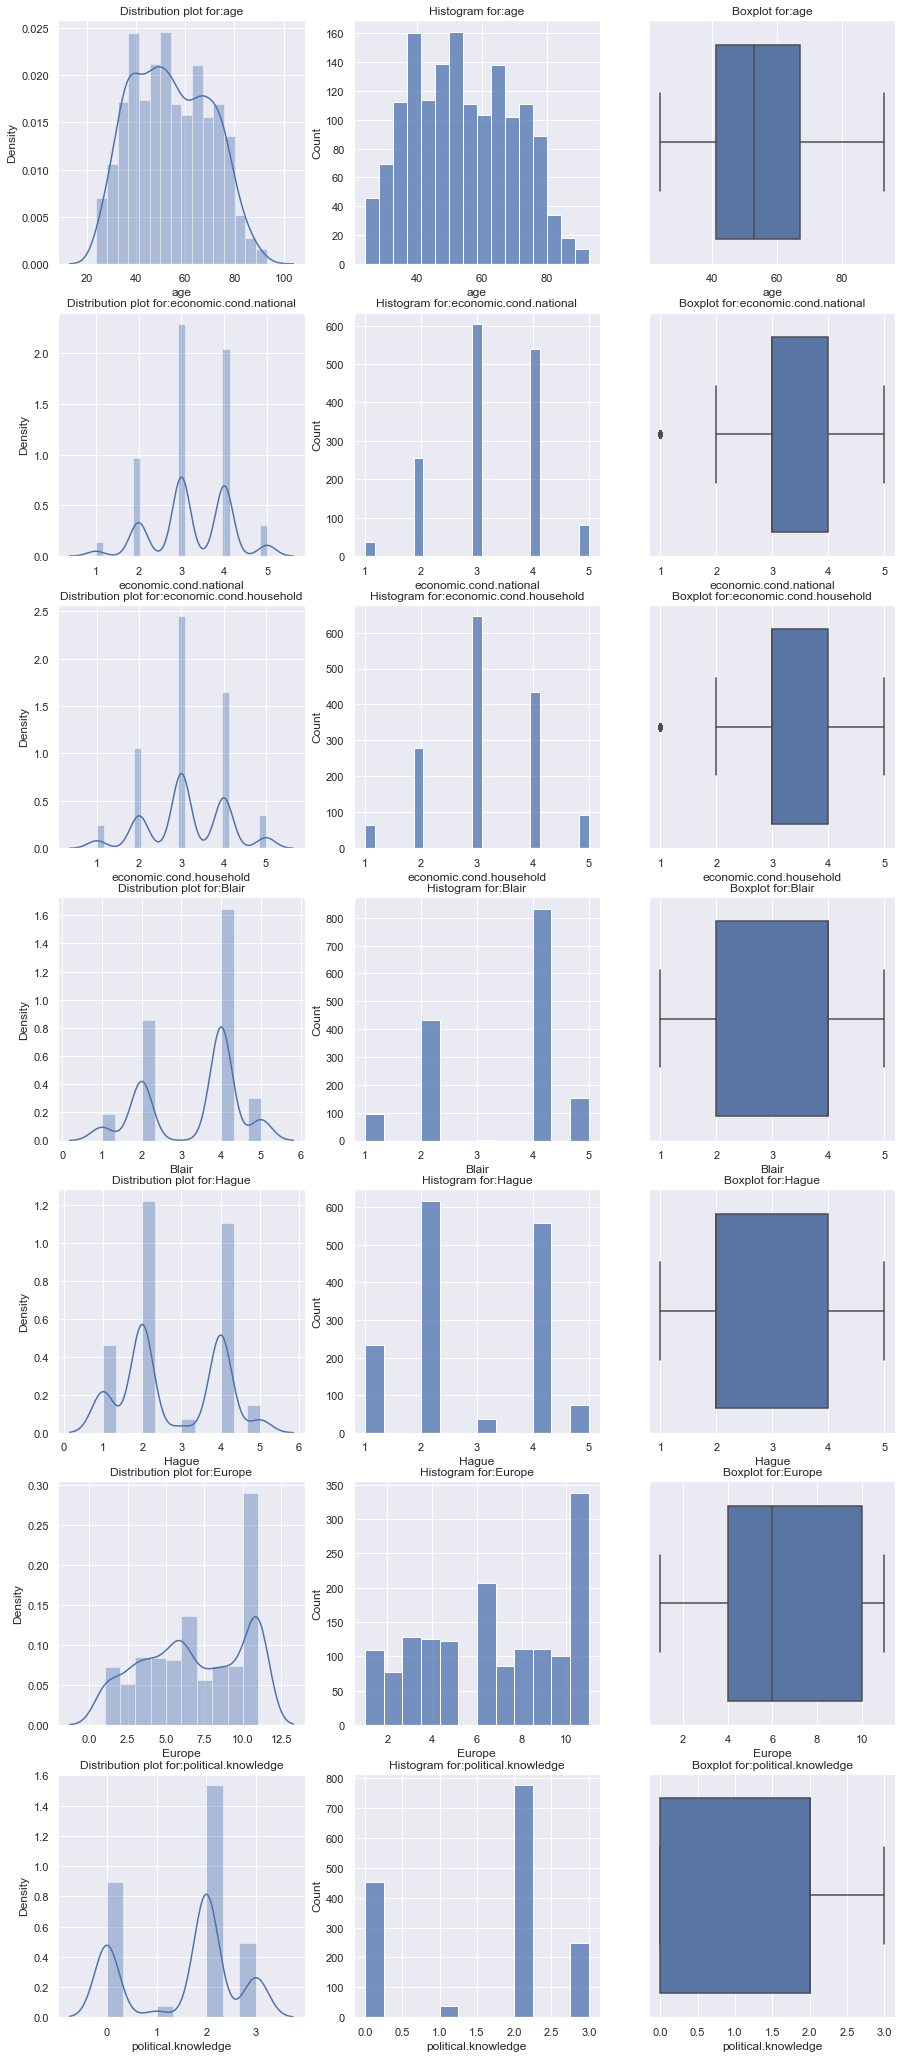

In [22]:
a=1
plt.figure(figsize=(15,112))
for i in Elect_df.columns:
    if Elect_df[i].dtype != 'object':
        plt.subplot(21,3,a)
        sns.distplot(Elect_df[i])
        plt.title("Distribution plot for:" + i)
        plt.subplot(21,3,a+1)
        sns.histplot(Elect_df[i])
        plt.title("Histogram for:" + i)
        plt.subplot(21,3,a+2)
        sns.boxplot(Elect_df[i])
        plt.title("Boxplot for:" + i)
        a+=3

Inference:
We can infer that the Labour party is being favoured more by the voters
The ratio of female to male is almost the same with female voters being more than male

Variable “economic.cond.national” and “economic.cond.household” show that most of the voters
have rated these two scales as 3 and 4 which is a moderate rating

Most of the voters have voted “Blair” as 4 compared to “Hague”
Many voters have rated “Hague” as 2 compared to “Blair”

There is a normal distribution in variable “age”. Most of the voters are found to be between the age of 40 to
80 years.

On a scale of 1 to 11, most of the voters have voted that the European integration is between 2 to 10
with maximum as 11. Hence, most of them have an inclination that the parties represent
‘Eurosceptic’ sentiment.

On a scale of 0 to 3, most of the voters have voted the Political knowledge to be 2 which is moderate.

BIVARIATE & MULTIVARIATE ANALYSIS

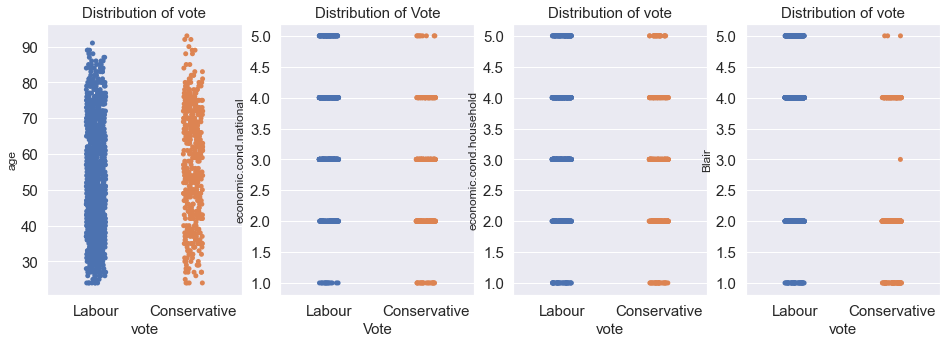

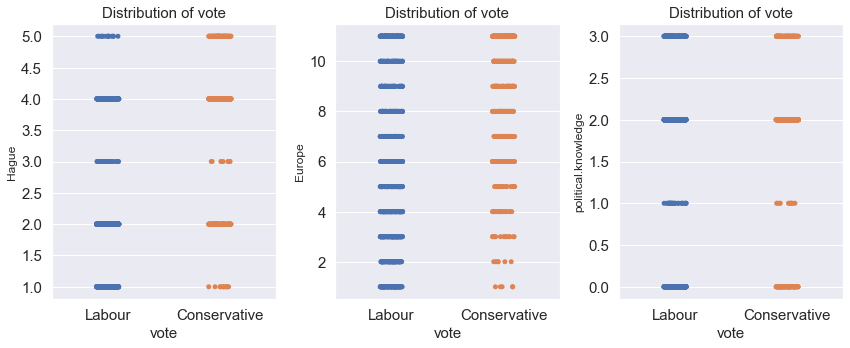

In [23]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,5))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(12,5))
sns.stripplot(Elect_df["vote"], Elect_df['age'],orient='v',jitter=True,ax=ax1)
ax1.set_xlabel('vote', fontsize=15)
ax1.set_title('Distribution of vote', fontsize=15)
ax1.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['economic.cond.national'], jitter=True, ax=ax2)
ax2.set_xlabel('Vote', fontsize=15)
ax2.set_title('Distribution of Vote', fontsize=15)
ax2.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['economic.cond.household'], jitter=True, ax=ax3)
ax3.set_xlabel('vote', fontsize=15)
ax3.set_title('Distribution of vote', fontsize=15)
ax3.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['Blair'], jitter=True, ax=ax4)
ax4.set_xlabel('vote', fontsize=15)
ax4.set_title('Distribution of vote', fontsize=15)
ax4.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['Hague'], jitter=True, ax=ax5)
ax5.set_xlabel('vote', fontsize=15)
ax5.set_title('Distribution of vote', fontsize=15)
ax5.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['Europe'], jitter=True, ax=ax6)
ax6.set_xlabel('vote', fontsize=15)
ax6.set_title('Distribution of vote', fontsize=15)
ax6.tick_params(labelsize=15)
sns.stripplot(Elect_df["vote"], Elect_df['political.knowledge'], jitter=True, ax=ax7)
ax7.set_xlabel('vote', fontsize=15)
ax7.set_title('Distribution of vote', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

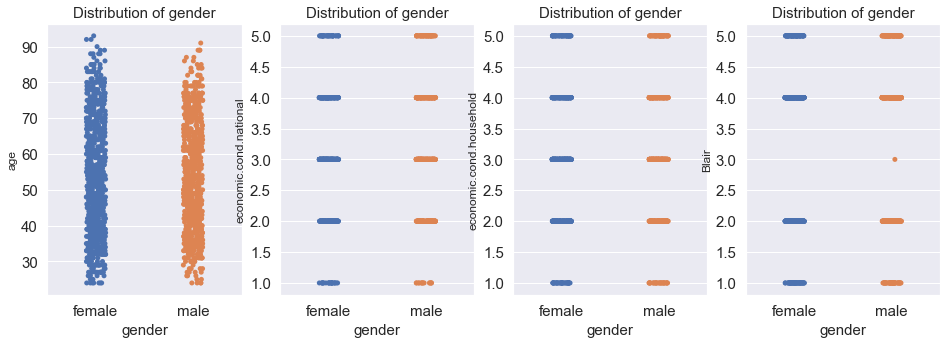

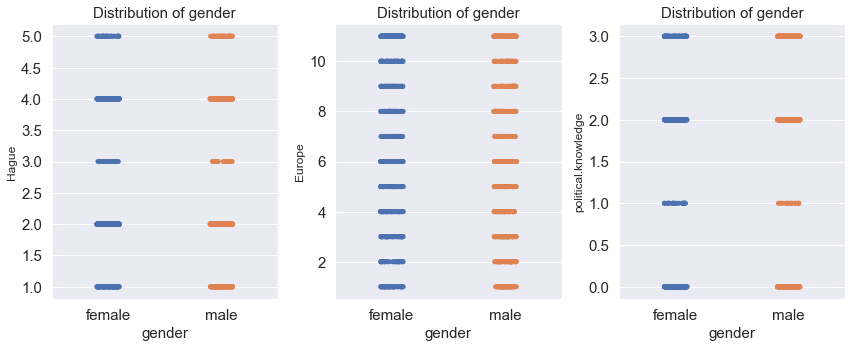

In [24]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,5))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(12,5))
sns.stripplot(Elect_df["gender"], Elect_df['age'],orient='v',jitter=True,ax=ax1)
ax1.set_xlabel('gender', fontsize=15)
ax1.set_title('Distribution of gender', fontsize=15)
ax1.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['economic.cond.national'], jitter=True, ax=ax2)
ax2.set_xlabel('gender', fontsize=15)
ax2.set_title('Distribution of gender', fontsize=15)
ax2.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['economic.cond.household'], jitter=True, ax=ax3)
ax3.set_xlabel('gender', fontsize=15)
ax3.set_title('Distribution of gender', fontsize=15)
ax3.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['Blair'], jitter=True, ax=ax4)
ax4.set_xlabel('gender', fontsize=15)
ax4.set_title('Distribution of gender', fontsize=15)
ax4.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['Hague'], jitter=True, ax=ax5)
ax5.set_xlabel('gender', fontsize=15)
ax5.set_title('Distribution of gender', fontsize=15)
ax5.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['Europe'], jitter=True, ax=ax6)
ax6.set_xlabel('gender', fontsize=15)
ax6.set_title('Distribution of gender', fontsize=15)
ax6.tick_params(labelsize=15)
sns.stripplot(Elect_df["gender"], Elect_df['political.knowledge'], jitter=True, ax=ax7)
ax7.set_xlabel('gender', fontsize=15)
ax7.set_title('Distribution of gender', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Inference:

As there are more voters for Labour party, the strip looks more dense for Labour party.Most of the voters above the age of 90 have voted for Conservative party. 

Most of the voters have rated Labour party as 5 compared to Conservative Party for their assessment on current national economic conditions.

More voters have rated Labour party to be a 5 when it comes to an assessment on economic household conditions.

None of the female voters rated Blair as 3 but few male voters have rated him as 3.

Many voters have rated Labour party between the scale of 2 to 5 compared to the Conservative Party. 

On a scale of 0 to 3, Labour party seems to have more voters rating them as 1 compared to Conservative
Party

<Figure size 1728x576 with 0 Axes>

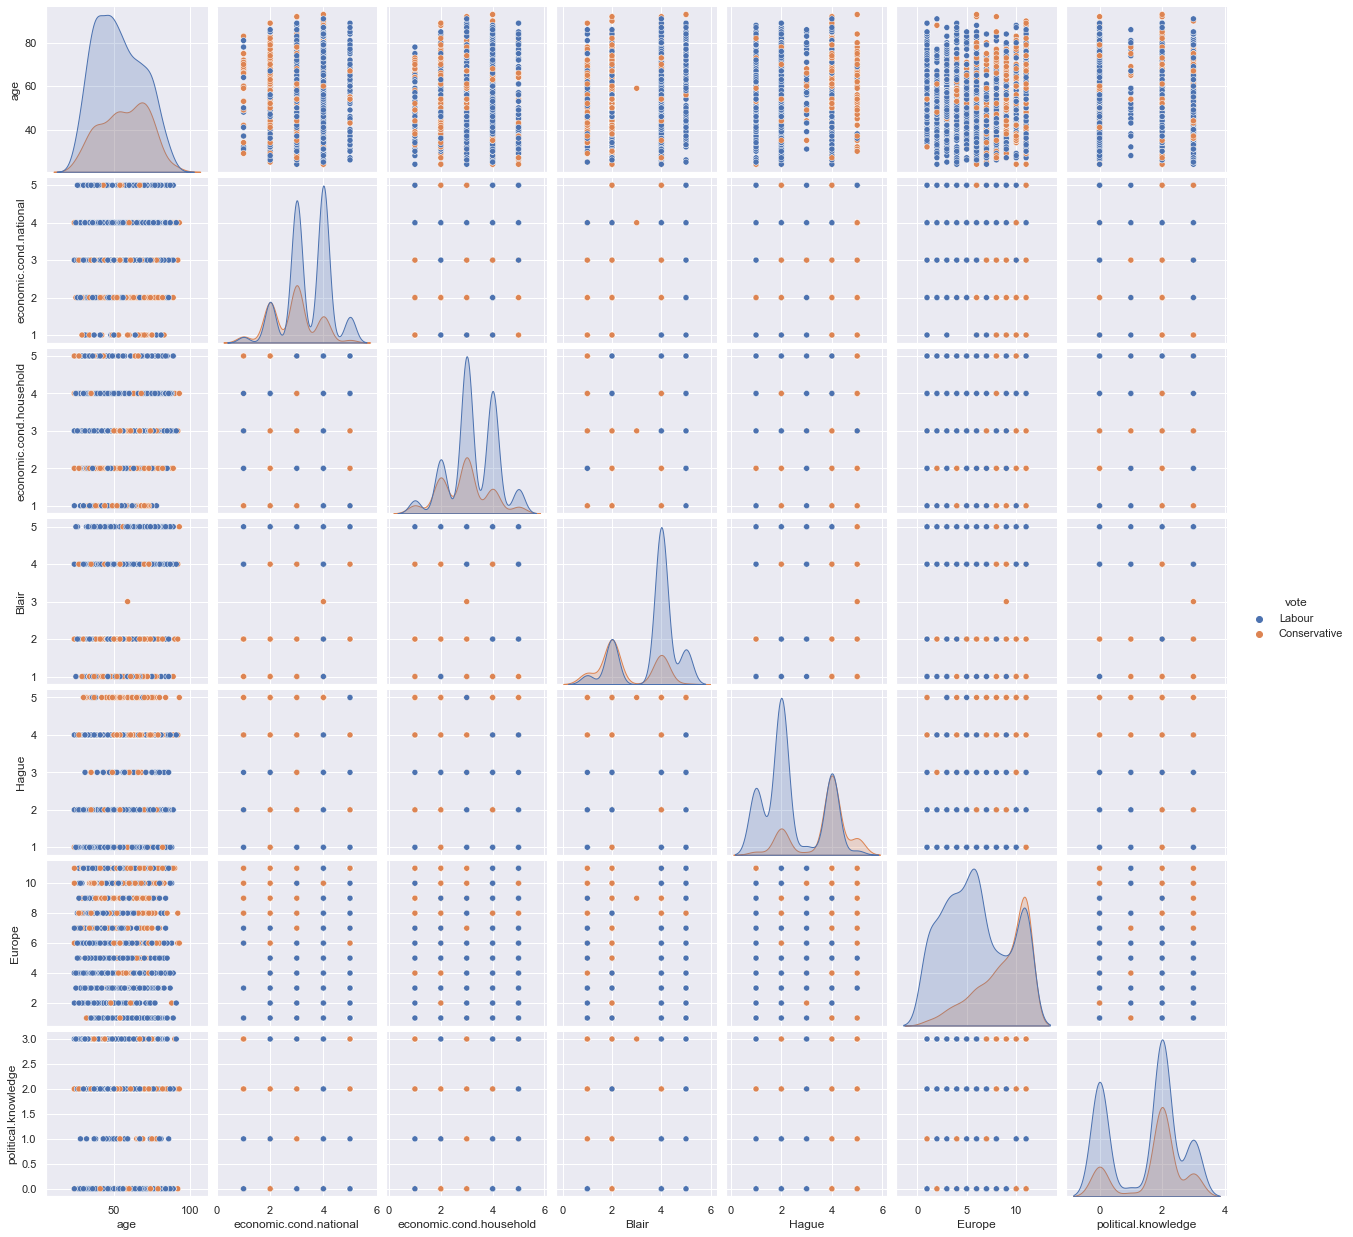

In [26]:
#Data Distribution
plt.figure(figsize=(24,8))
sns.pairplot(Elect_df,hue='vote');

In [27]:
Elect_df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


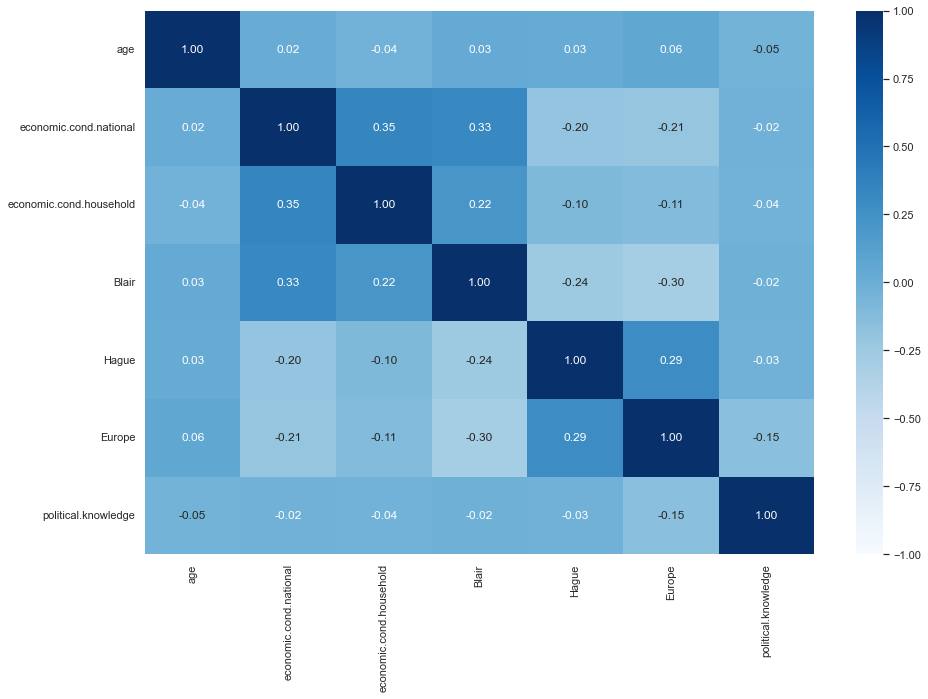

In [28]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(Elect_df.corr(), annot=True, fmt='.2f', cmap='Blues', vmax=1, vmin=-1);

Inference:

The heat map shows that there is no high correlation between any of the variables.

There is negative correlation between age and political knowledge and “economic.cond.household”

Variables “economic.cond.national” and “economic.cond.household” have the highest correlation of
0.35.

Pairplot shows no correlation between variables.

Check for Outliers

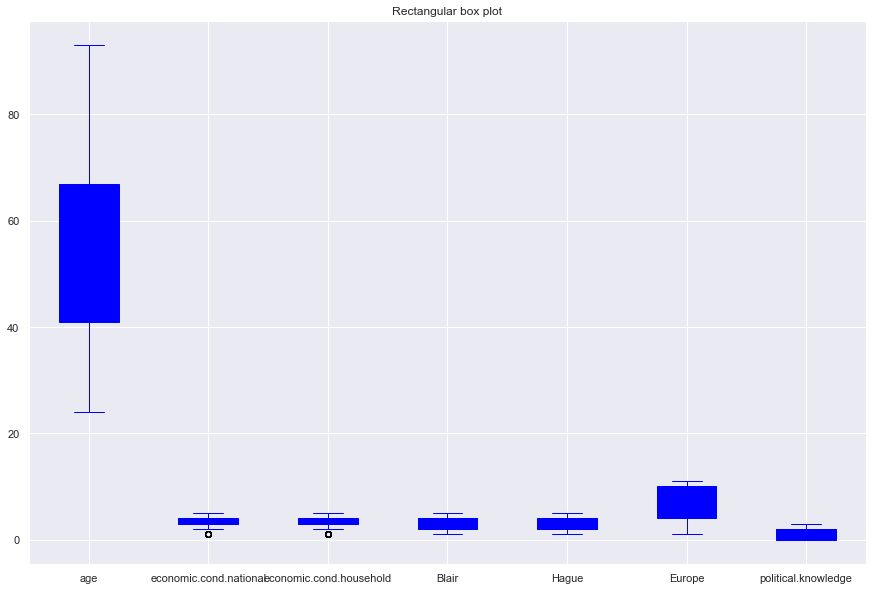

In [31]:
#Check outliers
plt.figure(figsize=(15,10))
Elect_df[num].boxplot(patch_artist = True, color='blue')
plt.title('Rectangular box plot')
plt.show();

There are nearly no outliers in most of the numerical columns, only outlier is in economic.cond.national
variable & economic.cond.household Variable . As 'Age' the only numeric variable is not having any outlier, let's proceed ahead.

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [44]:
cat1 = ['vote', 'gender']

In [62]:
df12 = Elect_df.copy()

In [78]:
df22=pd.get_dummies(df12, columns=cat1,drop_first=True)
df22.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [66]:
# Independent Variables
X=df22.drop('vote_Labour',axis=1)
# Dependent Variable
y=df22['vote_Labour']

In [67]:
# Variance before scaling
X.var()

age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender_male                  0.249099
dtype: float64

Scaling is done on continuous variables in a dataset with different unit of measures.
All variables are either categorical or ordinal except for variable “age”.
For Logistic regression, LDA and Naïve Baye’s model we need not perform any scaling, however, for KNN it is necessary to scale the data, as it a distance-based algorithm (typically based on Euclidean distance).
Let's scale the variables. 

In [74]:
from scipy.stats import zscore
X = X.apply(zscore)
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [75]:
X.var()

age                        1.00066
economic.cond.national     1.00066
economic.cond.household    1.00066
Blair                      1.00066
Hague                      1.00066
Europe                     1.00066
political.knowledge        1.00066
gender_male                1.00066
dtype: float64

Now variance is the same

In [76]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: vote_Labour, Length: 1517, dtype: uint8

Train-Test Split Split X and y into training and test set in 70:30 ratio

In [79]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1)

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

LOGISTIC REGRESSION

In [102]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [103]:
## Performance Matrix on train data set
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score_train=Logistic_model.score(X_train,y_train) ## Accuracy
print("The Logistic Regression Model Score on train data set is %.3f " % Logistic_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict)) ## Confusion Matrix
print(metrics.classification_report(y_train,y_train_predict)) ## Classification report

The Logistic Regression Model Score on train data set is 0.831 
[[196 111]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



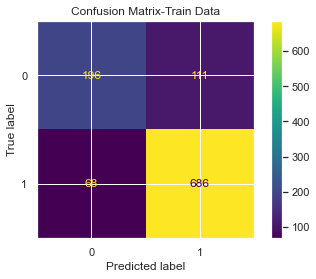

In [104]:
# confusion matrix on the train data
plot_confusion_matrix(Logistic_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [105]:
## Performance Matrix on test data set
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score_test=Logistic_model.score(X_test,y_test) ## Accuracy
print("The Logistic Regression Model Score on test data set is %.3f " % Logistic_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict)) ## Confusion Matrix
print(metrics.classification_report(y_test,y_test_predict)) ## Classification report

The Logistic Regression Model Score on test data set is 0.836 
[[113  40]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



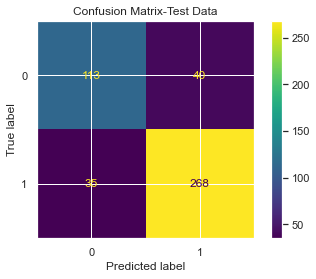

In [106]:
# confusion matrix on the test data
plot_confusion_matrix(Logistic_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

Training Data and Test Data Comparison & Inference

The accuracy of model in training set is 0.83 and on testing set is 0.84, which is good and very
close to each other.
The recall of Conservative party is better on Testing data whereas the recall of Labour party is
better on Training data
Overall it is a good model and there is no over fitting found.

Applying GridSearchCV for Logistic Regression(Model Tuning)

In [107]:
grid={'penalty':['l2','none','l1','elasticnet'],
 'solver':['liblinear','lbfgs','newton-cg'],
 'tol':[0.0001,0.00001],
 'max_iter': [10000, 5000,15000]}

In [108]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = Logistic_model, param_grid = grid, cv = cv, n_jobs=2)
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=2,
             param_grid={'max_iter': [10000, 5000, 15000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]})

In [109]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, verbose=True)


In [110]:
best_model_lr = grid_search.best_estimator_

In [111]:
# Prediction on the training set
ytrain_predict_lr = best_model_lr.predict(X_train)
ytest_predict_lr = best_model_lr.predict(X_test)

In [112]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.423790,0.576210
1,0.150104,0.849896
2,0.007470,0.992530
3,0.833130,0.166870
4,0.069756,0.930244


Model Evaluation for Train Data

In [116]:
print("The Best Logistic Regression Model Score on train data set post tuning is %.3f " % best_model_lr.score(X_train, y_train))

The Best Logistic Regression Model Score on train data set post tuning is 0.831 


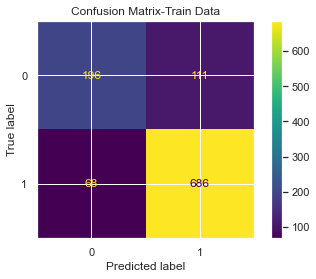

In [117]:
# confusion matrix on the train data
plot_confusion_matrix(best_model_lr,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [118]:
print("The Best Logistic Regression Model Score on test data set post tuning is %.3f " % best_model_lr.score(X_test, y_test))

The Best Logistic Regression Model Score on test data set post tuning is 0.831 


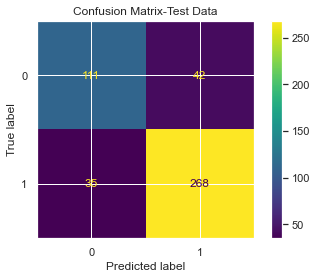

In [119]:
# confusion matrix on the test data
plot_confusion_matrix(best_model_lr,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [121]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lr))
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lr))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [122]:
(best_model_lr.score(X_train, y_train)-best_model_lr.score(X_test, y_test))

0.0001508838070671814

The difference is very less hence the LR tuned model is a good fit.

LINEAR DISCRIMINANT ANALYSIS

In [123]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [124]:
## Performance Matrix on train data set
y_train_predict=LDA_model.predict(X_train)
LDA_model_score_train=LDA_model.score(X_train,y_train)
print("The LDA Model Score on train data set is %.3f " % LDA_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The LDA Model Score on train data set is 0.834 
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [125]:
#Performance Matrix on test data set
y_test_predict=LDA_model.predict(X_test)
LDA_model_score_test=LDA_model.score(X_test,y_test)
print("The LDA Model Score on test data set is %.3f " % LDA_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

The LDA Model Score on test data set is 0.833 
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Applying GridSearchCV for LDA

In [126]:
grid_lda ={'solver' :['svd', 'lsqr', 'eigen']}
grid_search_lda = GridSearchCV(estimator = LDA_model, param_grid = grid_lda, cv = cv, n_jobs=2)
grid_search_lda.fit(X_train, y_train)
best_model_lda = grid_search_lda.best_estimator_

Model Evaluation for Train Data

In [127]:
ytrain_predict_lda = best_model_lda.predict(X_train)
ytest_predict_lda= best_model_lda.predict(X_test)

In [128]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [130]:
#### Model Evaluation for Train Data
print("The Best LDA Model Score on train data set post tuning is %.3f " % best_model_lda.score(X_train,y_train))

The Best LDA Model Score on train data set post tuning is 0.834 


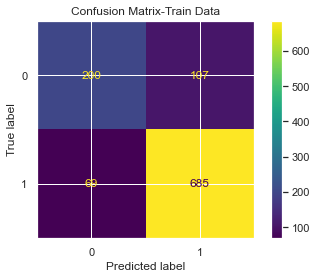

In [131]:
# confusion matrix on the train data
plot_confusion_matrix(best_model_lda,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [132]:
#### Model Evaluation for Test Data
print("The Best LDA Model Score on test data set post tuning is %.3f " % best_model_lda.score(X_test,y_test))

The Best LDA Model Score on test data set post tuning is 0.833 


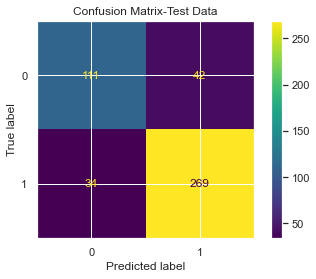

In [133]:
# confusion matrix on the test data
plot_confusion_matrix(best_model_lda,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [164]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lda))
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lda))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [136]:
(best_model_lda.score(X_train, y_train)-best_model_lda.score(X_test, y_test))

0.0007854225573358242

The difference is very less hence this lda tuned model is a good fit. No overfitting or underfitting.

The accuracy of model in training set and testing set is the same which is 0.83.

The recall of Conservative party is better on Testing data whereas the recall of Labour party is better on Training data
Overall the model is performing well.

Comparison of two models:

While comparing both these models, we find both results are almost same, but LDA works better since the recall with LDA is slightly better on Testing data.

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered. We have already done that to our dataset.

In [137]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [138]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score_train=KNN_model.score(X_train, y_train)
print("The KNN Model Score on Train data %.3f " % KNN_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The KNN Model Score on Train data 0.856 
[[218  89]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [139]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score_test = KNN_model.score(X_test, y_test)
print("The KNN Model Score on Test data %.3f " % KNN_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The KNN Model Score on Test data 0.825 
[[105  48]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from
K=1,3,5,7....19 using the Mis classification error
Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours
= 1,3,5...19 and find the model with lowest MCE

In [140]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.1885964912280702,
 0.17543859649122806,
 0.18201754385964908,
 0.17763157894736847,
 0.17105263157894735,
 0.17763157894736847,
 0.17324561403508776,
 0.16666666666666663,
 0.16666666666666663]

Plot misclassification error vs k (with k value on X-axis)

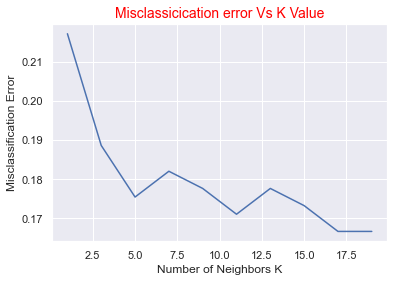

In [141]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title("Misclassicication error Vs K Value",fontsize=14,color = 'red');
plt.show()

For K = 11 it is giving the best test accuracy. We will build the model with k=11

In [142]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model_1=KNeighborsClassifier(n_neighbors= 11)
KNN_model_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

Performance Matrix of KNN New Model on train data set

In [143]:
## Performance Matrix on train data set
y_train_predict = KNN_model_1.predict(X_train)
KNN_model_score_train_New=KNN_model_1.score(X_train, y_train)
print("The KNN Model Score on Train data %.3f " % KNN_model_score_train_New)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The KNN Model Score on Train data 0.840 
[[208  99]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



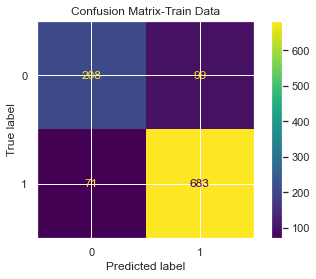

In [144]:
# confusion matrix on the train data
plot_confusion_matrix(KNN_model_1,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

Test set

In [145]:
## Performance Matrix on test data set
y_test_predict = KNN_model_1.predict(X_test)
KNN_model_score_test_New = KNN_model_1.score(X_test, y_test)
print("The KNN Model Score on Test data %.3f " % KNN_model_score_test_New)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The KNN Model Score on Test data 0.829 
[[105  48]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



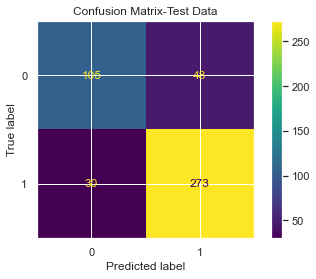

In [146]:
# confusion matrix on the test data
plot_confusion_matrix(KNN_model_1,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

Accuracy on Train data is 0.84 & on test data is 0.83.

Training and Testing results shows that the model is excellent with good precision and recall values.

This KNN model have good accuracy and recall values.

Naive Bayes

In [147]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [148]:
#Performance Matrix on train data set
y_train_predict=NB_model.predict(X_train)
Naive_Bayes_model_score_train=NB_model.score(X_train, y_train) ## Accuracy
print("The Naive Bayes Model Score on train data is %.3f " % Naive_Bayes_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict)) ## confusion_matrix
print(metrics.classification_report(y_train,y_train_predict)) ## classification_report

The Naive Bayes Model Score on train data is 0.835 
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



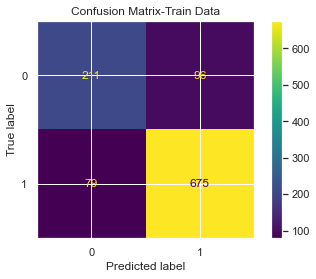

In [149]:
# confusion matrix on the train data
plot_confusion_matrix(NB_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [150]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
Naive_Bayes_model_score_test=NB_model.score(X_test, y_test) ## Accuracy
print("The Naive Bayes Model Score on test data is %.3f " % Naive_Bayes_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict)) ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict)) ## classification_report

The Naive Bayes Model Score on test data is 0.822 
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



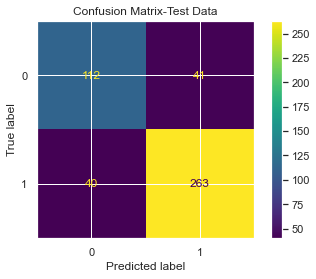

In [151]:
# confusion matrix on the test data
plot_confusion_matrix(NB_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

Naive Bayes with SMOTE

In [153]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [154]:
from imblearn.over_sampling import SMOTE
#SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [155]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [156]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
SMOTE_model_score_train = NB_SM_model.score(X_train_res, y_train_res)
print("The SMOTE Model Score for train data set is %.3f " % SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

The SMOTE Model Score for train data set is 0.828 
[[621 133]
 [127 627]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       754
           1       0.82      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



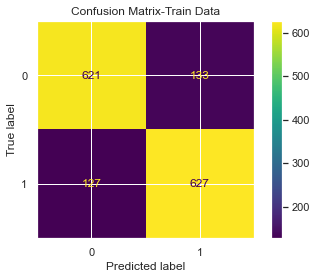

In [158]:
# confusion matrix on the train data
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [159]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
SMOTE_model_score_test = NB_SM_model.score(X_test, y_test)
print("The SMOTE Model Score for test data set is %.3f " % SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The SMOTE Model Score for test data set is 0.809 
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



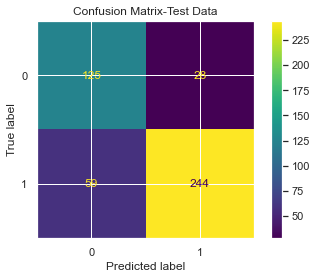

In [161]:
# confusion matrix on the test data
plot_confusion_matrix(NB_SM_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

The SMOTE model accuracy on train data is 0.83 & on test data is 0.81. No overfitting or underfitting.

Training and Testing results shows that the model neither overfitting nor underfitting.

The Naive Bayes model also performs well with better accuracy and recall values.

Even though NB and KNN have same Train and Test accuracy. Based on their recallvalue in test dataset it is evident that KNN performs better than Naive Bayes.

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

MODEL TUNING

Logistic regression model & LDA model Tuning has already been done using gridsearch. Results are as follows - 

In [162]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lr))
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lr))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [163]:
(best_model_lr.score(X_train, y_train)-best_model_lr.score(X_test, y_test))

0.0001508838070671814

The difference is very less between train and test model hence the LR tuned model is a good & better fit.

In [165]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lda))
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lda))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [166]:
(best_model_lda.score(X_train, y_train)-best_model_lda.score(X_test, y_test))

0.0007854225573358242

The difference is very less hence this lda tuned model is a good & better fit. No overfitting or underfitting.

KNN model with k=11 is a better & good fit. 

Naive Bayes with SMOTE model is a better & good fit.

RANDOM FOREST

In [167]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [168]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
RF_model_score_train =RF_model.score(X_train, y_train)
print("The random Forest Score on train data is %.2f " % RF_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The random Forest Score on train data is 1.00 
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



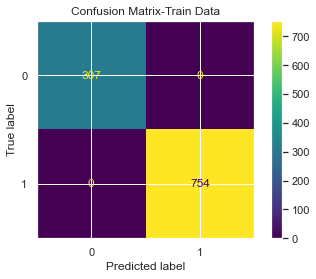

In [169]:
# confusion matrix on the train data
plot_confusion_matrix(RF_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [170]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
RF_model_score_test = RF_model.score(X_test, y_test)
print("The random Forest Score on test data is %.3f " % RF_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The random Forest Score on test data is 0.831 
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



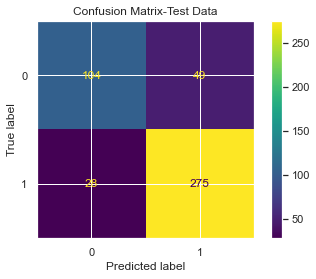

In [171]:
# confusion matrix on the test data
plot_confusion_matrix(RF_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [172]:
(RF_model_score_train-RF_model_score_test)

0.16885964912280704

There is a lot of difference between train and test set. This seems to be a case of overfitting model.

Bagging

In [173]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [174]:
## Performance Matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score_train=Bagging_model.score(X_train,y_train)
print("The Bagging Model Score for train data set is %.2f " % Bagging_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The Bagging Model Score for train data set is 0.97 
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



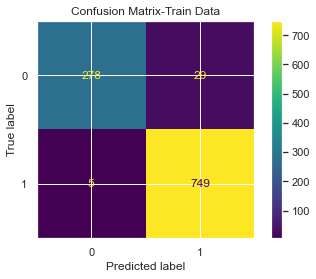

In [176]:
# confusion matrix on the train data
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [175]:
## Performance Matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score_test=Bagging_model.score(X_test,y_test)
print("The Bagging Model Score for test data set is %.2f " % Bagging_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

The Bagging Model Score for test data set is 0.83 
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



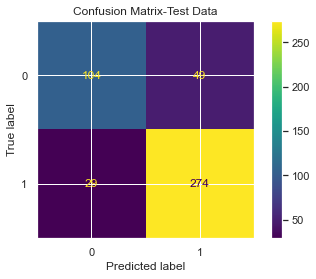

In [177]:
# confusion matrix on the test data
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [178]:
(Bagging_model_score_train-Bagging_model_score_test)

0.13900739123964478

Random Forest Bagging has reduced the difference of model score of train and test data. Hence it's better fit.

Boosting

Ada Boost

In [179]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [180]:
## Performance Matrix on train data set
y_train_predict=ADB_model.predict(X_train)
ADB_model_score_train=ADB_model.score(X_train,y_train)
print("The ADA boost Model Score for train data set is %.3f " % ADB_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The ADA boost Model Score for train data set is 0.850 
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



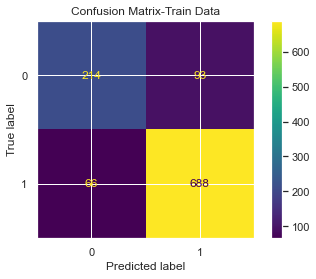

In [183]:
# confusion matrix on the train data
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [181]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADB_model_score_test = ADB_model.score(X_test, y_test)
print("The ADA boost Model Score for test data set is %.3f " % ADB_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The ADA boost Model Score for test data set is 0.814 
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



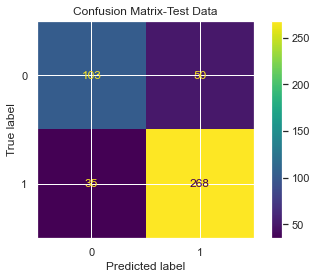

In [184]:
# confusion matrix on the test data
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [185]:
(ADB_model_score_train-ADB_model_score_test)

0.03654488483225027

Less difference hence it is not a case of overfitting or underfitting

Gradient Boosting

In [186]:
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [187]:
## Performance Matrix on train data set
y_train_predict = gbc_model.predict(X_train)
gbc_model_score_train = gbc_model.score(X_train, y_train)
print("The Gradient Boosting Score for train data set is %.2f " % gbc_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The Gradient Boosting Score for train data set is 0.89 
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



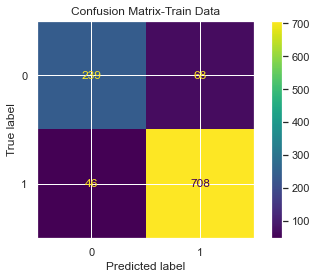

In [190]:
# confusion matrix on the train data
plot_confusion_matrix(gbc_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

In [188]:
## Performance Matrix on test data set
y_test_predict = gbc_model.predict(X_test)
gbc_model_score_test = gbc_model.score(X_test, y_test)
print("The Gradient Boosting Score for train data set is %.2f " % gbc_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The Gradient Boosting Score for train data set is 0.84 
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



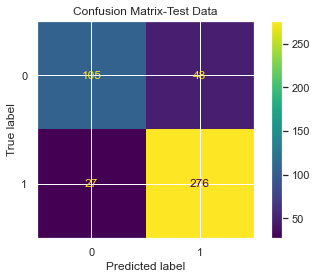

In [191]:
# confusion matrix on the test data
plot_confusion_matrix(gbc_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

In [189]:
(gbc_model_score_train-gbc_model_score_test)

0.05702787836698253

Less difference shows good fit. Hence it's not a case of overfitting or underfitting.

ADA BOOST SEEMS TO PERFORM BETTER than gradient boosting.

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

Performance Matrix of Logistic Regression on train & test data set

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061

The Best Logistic Regression Model Score on train data set post tuning is 0.831 


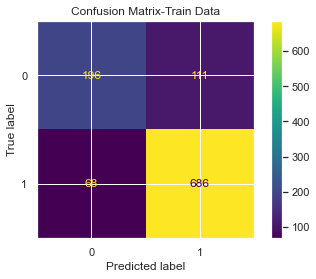

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

The Best Logistic Regression Model Score on test data set post tuning is 0.831 


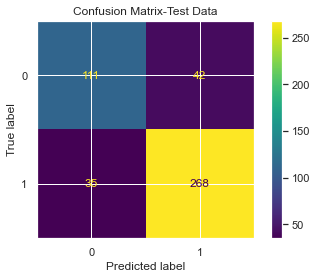

In [212]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lr))

print("The Best Logistic Regression Model Score on train data set post tuning is %.3f " % best_model_lr.score(X_train, y_train))

# confusion matrix on the train data
plot_confusion_matrix(best_model_lr,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lr))

print("The Best Logistic Regression Model Score on test data set post tuning is %.3f " % best_model_lr.score(X_test, y_test))

# confusion matrix on the test data
plot_confusion_matrix(best_model_lr,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for Logistic Regression on train & test data set

The ROC_AUC score for Logistic Regression Train data set: 0.890


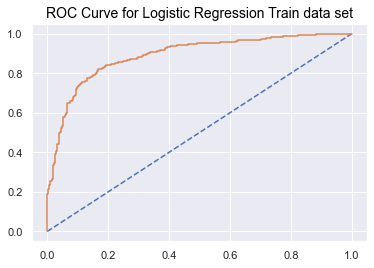

In [196]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('The ROC_AUC score for Logistic Regression Train data set: %.3f' % auc)
# calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for Logistic Regression Train data set",fontsize=14,color = 'black');

The ROC_AUC score for Logistic Regression Test data set : 0.883


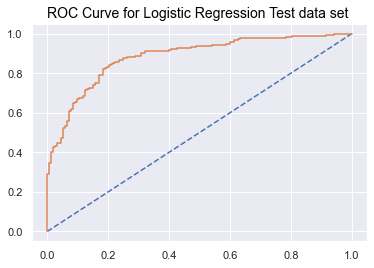

In [198]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('The ROC_AUC score for Logistic Regression Test data set : %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for Logistic Regression Test data set ",fontsize=14,color = 'black');

Performance Matrix of LDA (linear discriminant analysis) on train & test data set

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

The Best LDA Model Score on train data set post tuning is 0.834 


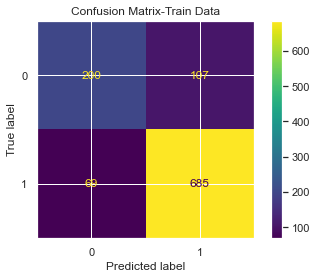

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456

The Best LDA Model Score on test data set post tuning is 0.833 


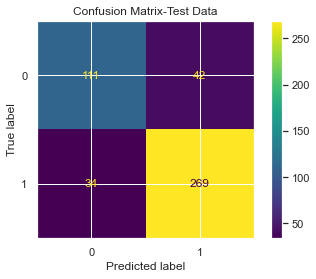

In [211]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lda))
print("The Best LDA Model Score on train data set post tuning is %.3f " % best_model_lda.score(X_train, y_train))

# confusion matrix on the train data
plot_confusion_matrix(best_model_lda,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lda))
print("The Best LDA Model Score on test data set post tuning is %.3f " % best_model_lda.score(X_test, y_test))

# confusion matrix on the test data
plot_confusion_matrix(best_model_lda,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for LDA (linear discriminant analysis) on train & test data set

The ROC_AUC score for LDA Train data set 0.89 


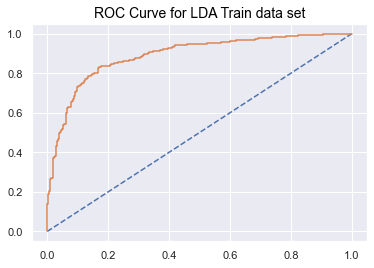

In [201]:
# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for LDA Train data set %.2f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for LDA Train data set",fontsize=14,color = 'black');

AUC: 0.888
The ROC_AUC score for LDA Test data set is ' 0.888 


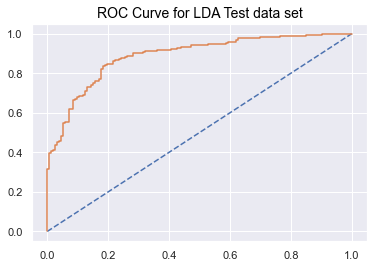

In [207]:
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
print("The ROC_AUC score for LDA Test data set is ' %.3f " % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for LDA Test data set",fontsize=14,color = 'black');

Performance Matrix of KNN on train & test data set

The KNN Model Score on Train data 0.840 
[[208  99]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



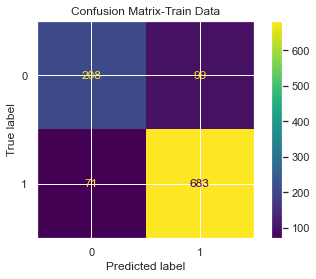

The KNN Model Score on Test data 0.829 
[[105  48]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



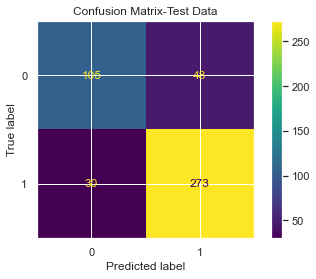

In [210]:
## Performance Matrix on train data set
y_train_predict = KNN_model_1.predict(X_train)
KNN_model_score_train_New=KNN_model_1.score(X_train, y_train)
print("The KNN Model Score on Train data %.3f " % KNN_model_score_train_New)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

# confusion matrix on the train data
plot_confusion_matrix(KNN_model_1,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

## Performance Matrix on test data set
y_test_predict = KNN_model_1.predict(X_test)
KNN_model_score_test_New = KNN_model_1.score(X_test, y_test)
print("The KNN Model Score on Test data %.3f " % KNN_model_score_test_New)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

# confusion matrix on the test data
plot_confusion_matrix(KNN_model_1,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for KNN on train & test data set

The ROC_AUC score for KNN train data set 0.91 


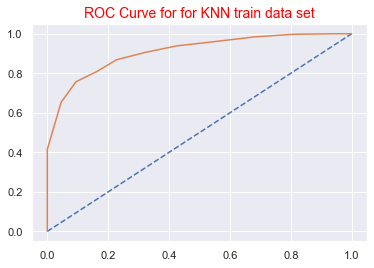

In [214]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for KNN train data set %.2f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for for KNN train data set",fontsize=14,color = 'red');

The ROC_AUC score for KNN train data set 0.89 


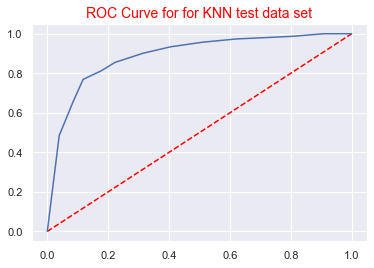

In [215]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print("The ROC_AUC score for KNN train data set %.2f " % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for for KNN test data set",fontsize=14,color = 'red');

Performance Matrix of Naive Bayes with SMOTE on train & test data set

The SMOTE Model Score for train data set is 0.828 
[[621 133]
 [127 627]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       754
           1       0.82      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



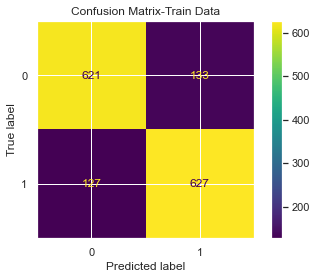

The SMOTE Model Score for test data set is 0.809 
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



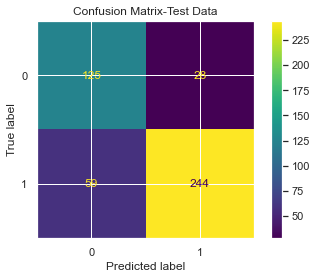

In [216]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
SMOTE_model_score_train = NB_SM_model.score(X_train_res, y_train_res)
print("The SMOTE Model Score for train data set is %.3f " % SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

# confusion matrix on the train data
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res);
plt.title('Confusion Matrix-Train Data')
plt.show()

## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
SMOTE_model_score_test = NB_SM_model.score(X_test, y_test)
print("The SMOTE Model Score for test data set is %.3f " % SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

# confusion matrix on the test data
plot_confusion_matrix(NB_SM_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for Naive Bayes with SMOTE Model on train & test data set


The ROC_AUC score for Naive Bayes with SMOTE train data set 0.90 


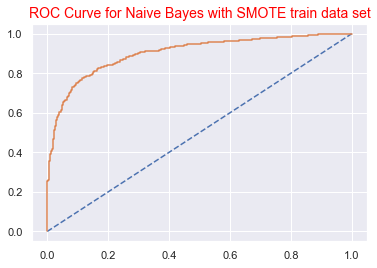

In [217]:
probs = NB_SM_model.predict_proba(X_train_res)
probs = probs[:, 1]
auc = roc_auc_score(y_train_res, probs)
print("The ROC_AUC score for Naive Bayes with SMOTE train data set %.2f " % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for Naive Bayes with SMOTE train data set",fontsize=14,color = 'red');

The ROC_AUC score for Naive Bayes with SMOTE Model on test data set 0.88 


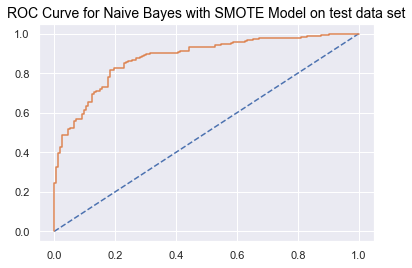

In [218]:
probs_test = NB_SM_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print("The ROC_AUC score for Naive Bayes with SMOTE Model on test data set %.2f " % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)
plt.title("ROC Curve for Naive Bayes with SMOTE Model on test data set",fontsize=14,color = 'black');

Performance Matrix of Bagging on train & test data set

The Bagging Model Score for train data set is 0.97 
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



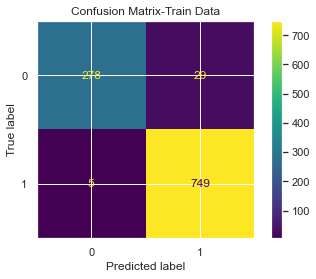

The Bagging Model Score for test data set is 0.83 
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



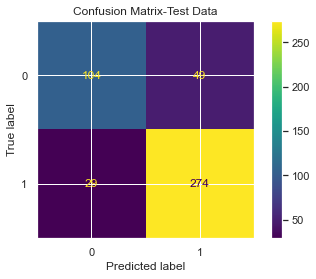

In [219]:
## Performance Matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score_train=Bagging_model.score(X_train,y_train)
print("The Bagging Model Score for train data set is %.2f " % Bagging_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

# confusion matrix on the train data
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

## Performance Matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score_test=Bagging_model.score(X_test,y_test)
print("The Bagging Model Score for test data set is %.2f " % Bagging_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

# confusion matrix on the test data
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for Bagging on train & test data set

The ROC_AUC score for Bagging train data set 1.00 


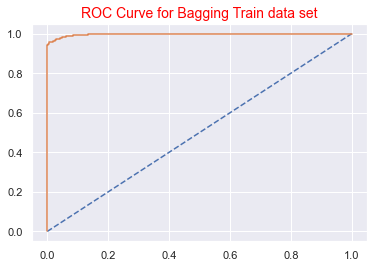

In [220]:
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for Bagging train data set %.2f " % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for Bagging Train data set",fontsize=14,color = 'red');

The AUC_ROC score for Bagging test data set 0.90 


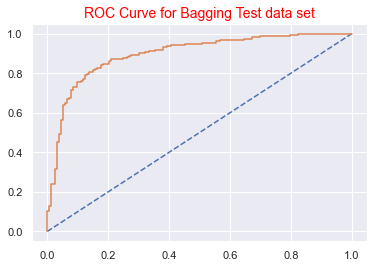

In [221]:
probs_test = Bagging_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print("The AUC_ROC score for Bagging test data set %.2f " % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for Bagging Test data set",fontsize=14,color = 'red');

Performance Matrix of Ada Boost on train data set

The ADA boost Model Score for train data set is 0.850 
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



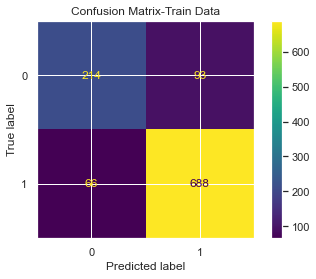

The ADA boost Model Score for test data set is 0.814 
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



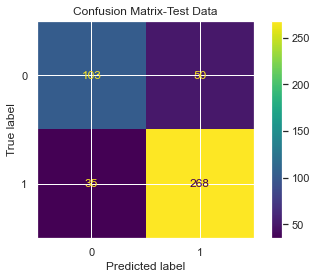

In [222]:
## Performance Matrix on train data set
y_train_predict=ADB_model.predict(X_train)
ADB_model_score_train=ADB_model.score(X_train,y_train)
print("The ADA boost Model Score for train data set is %.3f " % ADB_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

# confusion matrix on the train data
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.title('Confusion Matrix-Train Data')
plt.show()

## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADB_model_score_test = ADB_model.score(X_test, y_test)
print("The ADA boost Model Score for test data set is %.3f " % ADB_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

# confusion matrix on the test data
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.title('Confusion Matrix-Test Data')
plt.show()

ROC_AUC Curve for Ada Boost on train & test data set

The AUC_ROC score for ADB Model train data set 0.91 


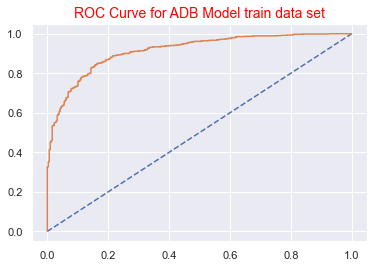

In [223]:
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print("The AUC_ROC score for ADB Model train data set %.2f " % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for ADB Model train data set",fontsize=14,color = 'red');

The AUC_ROC score for ADB Model test data set 0.88 


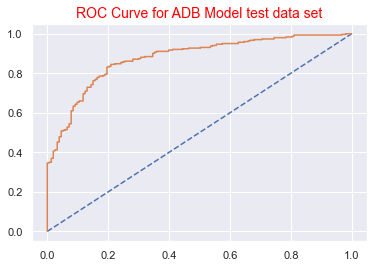

In [224]:
probs_test = ADB_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print("The AUC_ROC score for ADB Model test data set %.2f " % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for ADB Model test data set",fontsize=14,color = 'red');


Comparison of Different Models

In [226]:
print("The Logistic Regression Model Score Post Tuning on train data set is %.3f " % best_model_lr.score(X_train, y_train))
print("The Logistic Regression Model Score Post Tuning on test data set is %.3f " % best_model_lr.score(X_test, y_test))
print("The LDA Model Score Post Tuning on train data set is %.3f " % best_model_lda.score(X_train, y_train))
print("The LDA Model Score Post Tuning on test data set is %.3f " % best_model_lda.score(X_test, y_test))
print("The KNN Model Score Post Tuning on Train data %.3f " % KNN_model_1.score(X_train, y_train))
print("The KNN Model Score Post Tuning on Test data %.3f " % KNN_model_1.score(X_test, y_test))
print("The Naive Bayes Model Score Post Tuning on train data is %.3f " % NB_SM_model.score(X_train_res, y_train_res))
print("The Naive Bayes Model Score Post Tuning on test data is %.3f " % NB_SM_model.score(X_test, y_test))
print("The Bagging Model Score Post Tuning on Train data %.3f " % Bagging_model.score(X_train,y_train))
print("The Bagging Model Score Post Tuning on Test data %.3f " % Bagging_model.score(X_test,y_test))
print("The AdaBoost Model Score on Train data %.3f " % ADB_model.score(X_train,y_train))
print("The AdaBoost Model Score on Test data %.3f " % ADB_model.score(X_test, y_test))
print("The GradientBoost Model Score on Train data %.3f " % gbc_model.score(X_train, y_train))
print("The GradientBoost Model Score on Test data %.3f " % gbc_model.score(X_test, y_test))

The Logistic Regression Model Score Post Tuning on train data set is 0.831 
The Logistic Regression Model Score Post Tuning on test data set is 0.831 
The LDA Model Score Post Tuning on train data set is 0.834 
The LDA Model Score Post Tuning on test data set is 0.833 
The KNN Model Score Post Tuning on Train data 0.840 
The KNN Model Score Post Tuning on Test data 0.829 
The Naive Bayes Model Score Post Tuning on train data is 0.828 
The Naive Bayes Model Score Post Tuning on test data is 0.809 
The Bagging Model Score Post Tuning on Train data 0.968 
The Bagging Model Score Post Tuning on Test data 0.829 
The AdaBoost Model Score on Train data 0.850 
The AdaBoost Model Score on Test data 0.814 
The GradientBoost Model Score on Train data 0.893 
The GradientBoost Model Score on Test data 0.836 


The basis on which models are evaluated are known as performance metrics. The metrics on which the model will be evaluated are

• Accuracy

• AUC

• Recall

• Precision

• F1-Score

From the above models,

• Basis on the accuracy – GradientBoost performed better than others.

• Basis on the AUC score – Logistic Regression performed better than others.

• Basis on recall – Bagging performed slightly better than others.

• Basis on Precision – Naïve Bayes performed slightly better than others.

• Basis on F1-Score – Logistic Regression along with some others performed well.

All the models performed well with slight difference ranging from (1-5%). 
Bagging seems to have large error in predicting test data as accuracy is too high for train data than test data.
From the above, on the basis of accuracy logistic regression performed better than others.

Observations
From above it can be observed that using SMOTE didn’t increase the performance of the models. Overall models without SMOTE performed well for data. Thus, there is no use of applying SMOTE here.
As for the scaled models, scaling only improved the performance of the distance based on algorithm for others it slightly decreased the performance overall. Here, only KNN for scaled data model performed slightly well.

Best Optimized model – On the basis of all the comparisons and performance metrics “Logistic Regression” with scaling performed the best out of all. Other models are having high error in accuracy in train and test data.

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

Insights and Recommendations

Accuracy on all the models appears to be similar to each other on train and test sets.

AUC is exactly same for both the train and the test data for all the models.

From the summary of the confusion matrix, we can see that the actual and the predicted data are very close to each other. This is the reflection of the right fit model.

F1 score for both the models are almost same for both the models on train and test data.

Model tuning on random forest models gives the better results than other models. But however, bagging on Random forest performs well on both the train and test sets with good accuracy and overall other performance measures as
well.

Boosting techniques has also shown a good performance results.

By comparing the performance metrics, we can conclude the following:

Logistic Regression, LDA, KNN and Gausion Naïve Bayes are good models because they work
well on both Training and Testing data with model accuracy similar across both training and
testing data.

However, LDA has better accuracy and recall and f1-score.

Gradient Boosting and Bagging using Random Forest is not a good model because it is
overfitting on training data and doesn’t perform well on testing data


Comparing all the Models we see that Logistic Regression, LDA, KNN and Gradient Boosting are good
models, however, Logistic & LDA Model gives better results. Best model is logistic regression as the difference of error is very less in training and test data has a best fit model.

We observe Labour has higher possibility of winning

Labour has higher voting possibility among all age groups except for very old people

Irrespective of the political knowledge levels or gender, Labour has an edge on higher votes

Where the Eurosceptic sentiment is more, Conservative has scope for winning

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

2.1) Find the number of characters, words and sentences for the mentioned documents.

In [1]:
## Importing the necessary libraries along with the standard import
import numpy as np
import pandas as pd
import re # this is the regular expression library which helps us manipulate text (strings)
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
# Code Snippet to extract the three speeches:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [3]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)


Numpy version: 1.21.5
Pandas version: 1.4.2
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.7
Matplotlib version: 3.5.1


In [4]:
inaugural.fileids()
FDR=inaugural.raw('1941-Roosevelt.txt')
JFK=inaugural.raw('1961-Kennedy.txt')
RNX=inaugural.raw('1973-Nixon.txt')

In [5]:
FDR

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [6]:
JFK

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [7]:
RNX

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [9]:
inaugural.fileids()
# Number of characters
FDR_char = inaugural.raw('1941-Roosevelt.txt')
JFK_char = inaugural.raw('1961-Kennedy.txt')
RNX_char = inaugural.raw('1973-Nixon.txt')
print('Number of Characters in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_char))
print('Number of Characters in Speech of President John F. Kennedy in 1961 are', len(JFK_char))
print('Number of Characters in Speech of President Richard Nixon in 1973 are', len(RNX_char))

Number of Characters in Speech of President Franklin D. Roosevelt in 1941 are 7571
Number of Characters in Speech of President John F. Kennedy in 1961 are 7618
Number of Characters in Speech of President Richard Nixon in 1973 are 9991


In [10]:
# Number of words
FDR_words = inaugural.words('1941-Roosevelt.txt')
JFK_words = inaugural.words('1961-Kennedy.txt')
RNX_words = inaugural.words('1973-Nixon.txt')
print('Number of words in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_words))
print('Number of words in Speech of President John F. Kennedy in 1961 are', len(JFK_words))
print('Number of words in Speech of President Richard Nixon in 1973 are', len(RNX_words))

Number of words in Speech of President Franklin D. Roosevelt in 1941 are 1536
Number of words in Speech of President John F. Kennedy in 1961 are 1546
Number of words in Speech of President Richard Nixon in 1973 are 2028


In [11]:
# Number of sentences
FDR_sen = inaugural.sents('1941-Roosevelt.txt')
JFK_sen = inaugural.sents('1961-Kennedy.txt')
RNX_sen = inaugural.sents('1973-Nixon.txt')
print('Number of Sentences in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_sen))
print('Number of Sentences in Speech of President John F. Kennedy in 1961 are', len(JFK_sen))
print('Number of Sentences in Speech of President Richard Nixon in 1973 are', len(RNX_sen))

Number of Sentences in Speech of President Franklin D. Roosevelt in 1941 are 68
Number of Sentences in Speech of President John F. Kennedy in 1961 are 52
Number of Sentences in Speech of President Richard Nixon in 1973 are 69


2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords_clean = set(stopwords.words('english')+list(string.punctuation))
def remove_stopwords(array,stopwords_clean):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords_clean and a!='--':
             filtered.append(al)
    return filtered
FDR_words_clean = remove_stopwords(FDR_words,stopwords_clean)
JFK_words_clean = remove_stopwords(JFK_words,stopwords_clean)
RNX_words_clean = remove_stopwords(RNX_words,stopwords_clean)
print('Number of words in Speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are', len(FDR_words)) 
print('Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are', len(FDR_words_clean))
print('Number of words in Speech of President John F. Kennedy in 1961-before removal of stopwords are', len(JFK_words))
print('Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are', len(JFK_words_clean))
print('Number of words in Speech of President Richard Nixon in 1973-before removal of stopwords are', len(RNX_words))
print('Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are', len(RNX_words_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are 1536
Number of words in Speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in Speech of President John F. Kennedy in 1961-before removal of stopwords are 1546
Number of words in Speech of President John F. Kennedy in 1961-after removal of stopwords are 697
Number of words in Speech of President Richard Nixon in 1973-before removal of stopwords are 2028
Number of words in Speech of President Richard Nixon in 1973-after removal of stopwords are 836


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Show a sample sentence after the removal of stopwords.

example_sent = """On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States."""

stopwords_clean = set(stopwords.words('english')+list(string.punctuation))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords_clean]

filtered_sentence = []

for w in word_tokens:
    if w not in stopwords_clean:
        filtered_sentence.append(w)

#Print Original sample sentence with stopwords.
print("Original example sentence", word_tokens)
#Print Filtered sentence after the removal of stopwords.
print("Filtered sentence", filtered_sentence)

Original example sentence ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.']
Filtered sentence ['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States']


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)


In [15]:
nltk.download('punkt')
from collections import Counter

# Word occurs the most number of times
def top3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(1)
    return most_occur
print('Top word which occured the most number of times in inaugural address of President Franklin in 1941 is', top3words(FDR_words_clean))
print('Top word which occured the most number of times in inaugural address of President John F. Kennedy is', top3words(JFK_words_clean))
print('Top word which occured the most number of times in inaugural address of President Richard Nixon is', top3words(RNX_words_clean))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top word which occured the most number of times in inaugural address of President Franklin in 1941 is [('nation', 12)]
Top word which occured the most number of times in inaugural address of President John F. Kennedy is [('let', 16)]
Top word which occured the most number of times in inaugural address of President Richard Nixon is [('us', 26)]


In [16]:
# Mention the top three words.
def top3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(3)
    return most_occur
print('Top 3 words which occured the most number of times in inaugural address of President Franklin in 1941 is', top3words(FDR_words_clean))
print('Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy is', top3words(JFK_words_clean))
print('Top 3 words which occured the most number of times in inaugural address of President Richard Nixon is', top3words(RNX_words_clean))

Top 3 words which occured the most number of times in inaugural address of President Franklin in 1941 is [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words which occured the most number of times in inaugural address of President John F. Kennedy is [('let', 16), ('us', 12), ('world', 8)]
Top 3 words which occured the most number of times in inaugural address of President Richard Nixon is [('us', 26), ('let', 22), ('america', 21)]


2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords).

In [18]:
pip install wordcloud  

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\users\lenovo\anaconda3\lib\site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)



In [19]:
# Word Cloud
from wordcloud import WordCloud
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Word Cloud for President Franklin D. Roosevelt speech in 1941


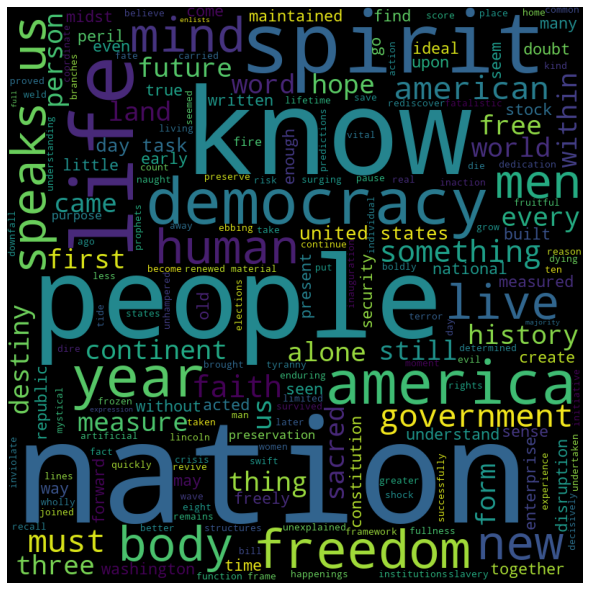

In [20]:
# Word Cloud for President Franklin D. Roosevelt speech in 1941
print('Word Cloud for President Franklin D. Roosevelt speech in 1941')
word_cloud((" ").join(FDR_words_clean))

Word Cloud for President John F. Kennedy speech in 1961


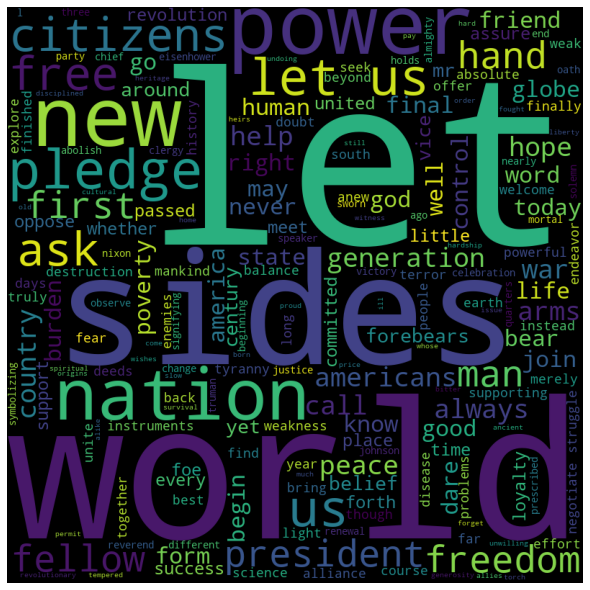

In [21]:
# Word Cloud for President John F. Kennedy speech in 1961
print('Word Cloud for President John F. Kennedy speech in 1961')
word_cloud((" ").join(JFK_words_clean))

Word Cloud for President Richard Nixon speech in 1973


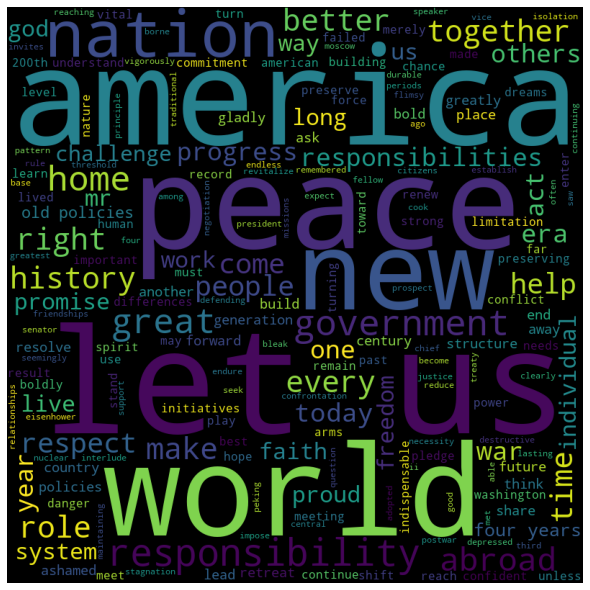

In [22]:
# Word Cloud for President Richard Nixon speech in 1973
print('Word Cloud for President Richard Nixon speech in 1973')
word_cloud((" ").join(RNX_words_clean))